Make sure everything runs as expected before you submit your notebook. First, **restart the kernel** (Kernel$\rightarrow$Restart) and then **run all cells** (Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID below:

In [1]:
NAME = "Benji van den Brand"
STUDENT_ID = "1328255"

"1328255"

---

# [5SSD0] Probabilistic Programming - Assignment 1

Year: 2023-2024

In this assignment, we will go through the Bayesian model design cycle:

 <img src="figures/modelling-procedure.png" alt="" width="600"> 

You will build a simple model, fit it to data and evaluate its performance on future data. Its performance is not great and you are challenged to improve it.

In [3]:
import Pkg; Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("LinearAlgebra")
Pkg.add("ProgressMeter")
Pkg.add("RxInfer")
Pkg.add("Plots")


    Updating registry at `C:\Users\benji\.julia\registries\General.toml`


   Resolving package versions...


   Installed Compat ─ v4.10.1


    Updating `C:\Github projects\BMLIP\lessons\assignments\Project.toml`
  [336ed68f] + CSV v0.10.11
    Updating `C:\Github projects\BMLIP\lessons\assignments\Manifest.toml`
  [336ed68f] + CSV v0.10.11
  [944b1d66] + CodecZlib v0.7.3
  [34da2185] + Compat v4.10.1
  [9a962f9c] + DataAPI v1.15.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.9.21
  [842dd82b] + InlineStrings v1.4.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [bac558e1] + OrderedCollections v1.6.3
  [69de0a69] + Parsers v2.8.0
  [2dfb63ee] + PooledArrays v1.4.3
  [aea7be01] + PrecompileTools v1.2.0
  [21216c6a] + Preferences v1.4.1
  [91c51154] + SentinelArrays v1.4.1
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.11.1
  [3bb67fe8] + TranscodingStreams v0.10.2
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
  [56f22d72] + Artifacts
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [9fa8497b] + Future
  [b77e0a4c] + InteractiveUtils
  [8f399da3] + Libdl


Precompiling 

project...


  ✓ Compat


  ✓ Compat → CompatLinearAlgebraExt


  ✓ FilePathsBase


  ✓ CSV
  4 dependencies successfully precompiled in 17 seconds. 19 already precompiled.
   Resolving package versions...


   Installed PrettyTables ─ v2.3.1
    Updating `C:\Github projects\BMLIP\lessons\assignments\Project.toml`
  [a93c6f00] + DataFrames v1.6.1
    Updating `C:\Github projects\BMLIP\lessons\assignments\Manifest.toml`


  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.6.1
  [864edb3b] + DataStructures v0.18.15
  [41ab1584] + InvertedIndices v1.3.0
  [b964fa9f] + LaTeXStrings v1.3.1
  [e1d29d7a] + Missings v1.1.0
  [08abe8d2] + PrettyTables v2.3.1
  [189a3867] + Reexport v1.2.2
  [a2af1166] + SortingAlgorithms v1.2.0
  [892a3eda] + StringManipulation v0.3.4
  [0dad84c5] + ArgTools v1.1.1
  [f43a241f] + Downloads v1.6.0
  [7b1f6079] + FileWatching
  [b27032c2] + LibCURL v0.6.4
  [76f85450] + LibGit2
  [ca575930] + NetworkOptions v1.2.0
  [44cfe95a] + Pkg v1.9.2
  [3fa0cd96] + REPL
  [6462fe0b] + Sockets
  [2f01184e] + SparseArrays
  [10745b16] + Statistics v1.9.0
  [a4e569a6] + Tar v1.10.0
  [deac9b47] + LibCURL_jll v8.4.0+0
  [29816b5a] + LibSSH2_jll v1.11.0+1
  [c8ffd9c3] + MbedTLS_jll v2.28.2+0
  [14a3606d] + MozillaCACerts_jll v2022.10.11
  [bea87d4a] + SuiteSparse_jll v5.10.1+6
  [8e850ede] + nghttp2_jll v1.52.0+1
  [3f19e933] + p7zip_jll v17.4.0+0


Precompiling project...


  ✓ DataStructures


  ✓ SortingAlgorithms


  ✓ PrettyTables


  ✓ DataFrames
  4 dependencies successfully precompiled in 56 seconds. 33 already precompiled.
   Resolving package versions...


    Updating `C:\Github projects\BMLIP\lessons\assignments\Project.toml`
  [37e2e46d] + LinearAlgebra
  No Changes to `C:\Github projects\BMLIP\lessons\assignments\Manifest.toml`

   Resolving package versions...


    Updating `C:\Github projects\BMLIP\lessons\assignments\Project.toml`
  [92933f4c] + ProgressMeter v1.9.0
    Updating `C:\Github projects\BMLIP\lessons\assignments\Manifest.toml`
  [92933f4c] + ProgressMeter v1.9.0
  [8ba89e20] + Distributed

   Resolving package versions...


   Installed Adapt ──────────────── v3.7.2


   Installed PDMats ─────────────── v0.11.31


   Installed FillArrays ─────────── v1.9.3


   Installed StaticArrayInterface ─ v1.5.0


   Installed FixedArguments ─────── v0.1.1


   Installed Distributions ──────── v0.25.104


   Installed ReactiveMP ─────────── v3.13.0


   Installed VectorizationBase ──── v0.21.65


   Installed DomainIntegrals ────── v0.4.6


   Installed DomainSets ─────────── v0.7.2


   Installed RxInfer ────────────── v2.15.0


    Updating `C:\Github projects\BMLIP\lessons\assignments\Project.toml`
  [86711068] + RxInfer v2.15.0
    Updating `C:\Github projects\BMLIP\lessons\assignments\Manifest.toml`
  [79e6a3ab] + Adapt v3.7.2
  [4fba245c] + ArrayInterface v7.6.1
  [4c555306] + ArrayLayouts v1.4.3
  [b4ee3484] + BayesBase v1.1.2
  [62783981] + BitTwiddlingConvenienceFunctions v0.1.5
  [2a0fbf3d] + CPUSummary v0.2.4
  [49dc2e85] + Calculus v0.5.1
  [fb6a15b2] + CloseOpenIntervals v0.1.12
  [861a8166] + Combinatorics v1.0.2
  [bbf7d656] + CommonSubexpressions v0.3.0
  [b152e2b5] + CompositeTypes v0.1.3
  [187b0558] + ConstructionBase v1.5.4
  [adafc99b] + CpuId v0.3.1
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [31c24e10] + Distributions v0.25.104
  [ffbed154] + DocStringExtensions v0.9.3
  [cc6bae93] + DomainIntegrals v0.4.6
  [5b8099bc] + DomainSets v0.7.2
  [fa6b7ba4] + DualNumbers v0.6.8
  [62312e5e] + ExponentialFamily v1.2.1
  [2d5283b6] + FastCholesky v1.3.0
⌅ [442a2c76] + Fas

Precompiling 

project...

  ✓ FixedArguments
  ✓ Adapt


  ✓ PDMats


  ✓ FillArrays


  ✓ QuadGK


  ✓ Adapt → AdaptStaticArraysExt


  ✓ StatsBase


  ✓ FillArrays → FillArraysPDMatsExt


  ✓ HCubature
  ✓ FillArrays → FillArraysSparseArraysExt


  ✓ OffsetArrays


  ✓ DomainSets


  ✓ FillArrays → FillArraysStatisticsExt


  ✓ StaticArrayInterface


  ✓ Rocket


  ✓ StaticArrayInterface → StaticArrayInterfaceStaticArraysExt


  ✓ DomainIntegrals


  ✓ StaticArrayInterface → StaticArrayInterfaceOffsetArraysExt


  ✓ CloseOpenIntervals


  ✓ Optim
  ✓ LayoutPointers


  ✓ Distributions


  ✓ Distributions → DistributionsTestExt


  ✓ ArrayLayouts


  ✓ ArrayLayouts → ArrayLayoutsSparseArraysExt


  ✓ MatrixFactorizations


  ✓ VectorizationBase


  ✓ SLEEFPirates


  ✓ LazyArrays


  ✓ LazyArrays → LazyArraysStaticArraysExt


  ✓ LoopVectorization


  ✓ LoopVectorization → SpecialFunctionsExt


  ✓ BayesBase


  ✓ ExponentialFamily


  ✓ ReactiveMP


  ✓ ReactiveMP → ReactiveMPRequiresExt


  ✓ RxInfer
  37 dependencies successfully precompiled in 73 seconds. 100 already precompiled.
   Resolving package versions...


   Installed XML2_jll ────── v2.12.2+0


   Installed Unitful ─────── v1.19.0


   Installed JpegTurbo_jll ─ v3.0.1+0


   Installed libpng_jll ──── v1.6.40+0


   Installed fzf_jll ─────── v0.43.0+0
   Installed JLFzf ───────── v0.1.7


   Installed HTTP ────────── v1.10.1


    Updating `C:\Github projects\BMLIP\lessons\assignments\Project.toml`
  [91a5bcdd] + Plots v1.39.0
    Updating `C:\Github projects\BMLIP\lessons\assignments\Manifest.toml`


  [d1d4a3ce] + BitFlags v0.1.8
  [35d6a980] + ColorSchemes v3.24.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.10
  [f0e56b4a] + ConcurrentUtilities v2.3.0
  [d38c429a] + Contour v0.6.2
  [8bb1440f] + DelimitedFiles v1.9.1
  [460bff9d] + ExceptionUnwrapping v0.1.9
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.2
  [28b8d3ca] + GR v0.72.10
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.10.1
  [1019f520] + JLFzf v0.1.7
  [682c06a0] + JSON v0.21.4
  [23fbe1c1] + Latexify v0.16.1
  [e6f89c97] + LoggingExtras v1.0.3
  [739be429] + MbedTLS v1.1.9
  [442fdcdd] + Measures v0.3.2
  [4d8831e6] + OpenSSL v1.4.1
  [b98c9c47] + Pipe v1.3.0
  [ccf2f8ad] + PlotThemes v3.1.0
  [995b91a9] + PlotUtils v1.3.5
  [91a5bcdd] + Plots v1.39.0
  [3cdcf5f2] + RecipesBase v1.3.4
  [01d81517] + RecipesPipeline v0.6.12
  [05181044] + RelocatableFolders v1.0.1
  [6c6a2e73] + Scratch v1.2.1
  [992d4aef


Precompiling 

project...

  ✓ fzf_jll
  ✓ libpng_jll
  ✓ JpegTurbo_jll
  ✓ XML2_jll


  ✓ JLFzf
  ✓ Libtiff_jll
  ✓ Gettext_jll
  ✓ XSLT_jll


  ✓ Latexify → DataFramesExt


  ✓ Glib_jll


  ✓ HTTP


  ✓ Cairo_jll


  ✓ Qt6Base_jll


  ✓ HarfBuzz_jll


  ✓ libass_jll


  ✓ FFMPEG_jll


  ✓ FFMPEG


  ✓ GR_jll


  ✓ GR


  ✓ Unitful


  ✓ Unitful → ConstructionBaseUnitfulExt


  ✓ UnitfulLatexify


  ✓ Plots


  ✓ Plots → UnitfulExt
  24 dependencies successfully precompiled in 89 seconds. 233 already precompiled.


In [10]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

using CSV
using DataFrames
using LinearAlgebra
using Distributions
using StatsFuns
using RxInfer
using Plots
using ProgressMeter
default(label="",
        grid=false, 
        linewidth=3, 
        markersize=4,
        guidefontsize=12, 
        margins=15Plots.pt)

  Activating project at `c:\Github projects\BMLIP\lessons\assignments`


## Problem: Forecasting Air Quality

Many Europeans suspect that the air quality in their city is declining. A [recent study](https://doi.org/10.1016/j.snb.2007.09.060) measured the air quality of a major city in North Italy using an electronic nose. The measurements were made in the middle of the city and reflect urban activity. We will inspect the specific chemical concentrations found and build a model to accurately predict CO for future time points.

![https://www.theguardian.com/environment/2020/apr/07/air-pollution-linked-to-far-higher-covid-19-death-rates-study-finds](figures/air-milan-wide.png)

Photograph taken by Claudio Furlan/LaPresse/Zuma Press/Rex/Shutterstock ([link](https://www.theguardian.com/environment/2020/apr/07/air-pollution-linked-to-far-higher-covid-19-death-rates-study-finds))

### Data

The data can be found here: https://archive.ics.uci.edu/ml/datasets/Air+Quality. I've done some pre-processing and selected the most important features. In this assignment we will infer parameters in a model of the data and predict air quality in the future. For that purpose, the data has been split into past and future.

In [15]:
past_data = DataFrame(CSV.File("data/airquality_past.csv"))

Row,time,CO
,DateTime,Float64
1,2004-03-10T18:00:00,1360.0
2,2004-03-10T19:00:00,1292.0
3,2004-03-10T20:00:00,1402.0
4,2004-03-10T21:00:00,1376.0
5,2004-03-10T22:00:00,1272.0
6,2004-03-10T23:00:00,1197.0
7,2004-03-11T00:00:00,1185.0
8,2004-03-11T01:00:00,1136.0
9,2004-03-11T02:00:00,1094.0


Let's visualize the carbon monoxide measurements over time.

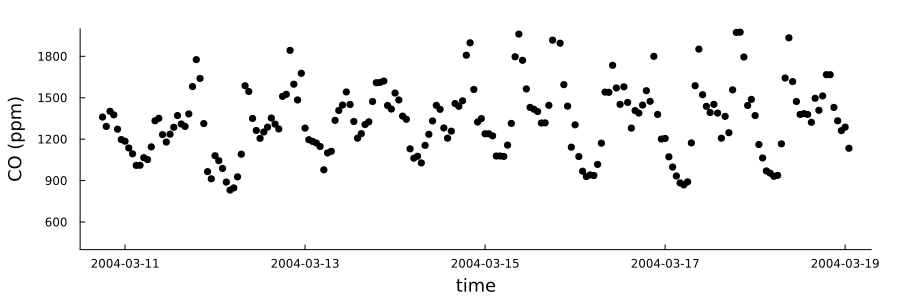

In [16]:
scatter(past_data[:,1], 
        past_data[:,2], 
        size=(900,300), 
        color="black", 
        xlabel="time", 
        ylabel="CO (ppm)",
        ylims=[400,2000])

## 1. Model specification & parameter estimation

We suspect that there is a temporal dependence in this dataset. In other words, the data changes relatively slowly over time and neighbouring data points end up being highly correlated. To exploit this correlation, we will build an _auto-regressive model_ of the form:

$$ y_k = \theta y_{k-1} + \epsilon_k \, , $$

where the noise $\epsilon_k$ is drawn from a zero-mean Gaussian with precision parameter $\tau$: 

$$ \epsilon_k \sim \mathcal{N}(0, \tau^{-1}) \, .$$

For now, we will use $\tau = 1.0$.

Tasks:
- [1pt] Specify the above equation as a probabilistic model in RxInfer, and infer a posterior distribution for $\theta$. Plot the inferred distribution over the interval $[0.9,\ 1.0]$.

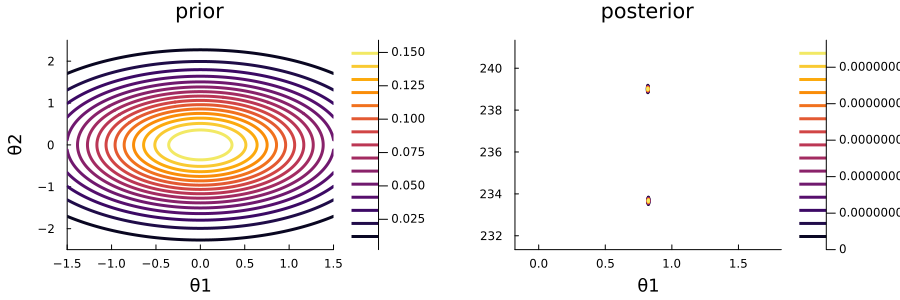

In [87]:
# YOUR CODE HERE
@model function auto_regression(μ_θ, Σ_θ, τ; N=1)
    "Bayesian linear regression"
    
    # Allocate data variables
    X = datavar(Vector{Float64}, N)
    y = datavar(Float64, N)
    
    # Prior distribution of coefficients
    θ ~ MvNormalMeanCovariance(μ_θ, Σ_θ)
    
    for i = 1:N

        # Likelihood of i-th sample
        y[i] ~ NormalMeanVariance(dot(θ,X[i]), τ^-1)
        
    end
    return y, X, θ
end

# Prior parameters
μ_θ, Σ_θ = (zeros(2), diagm(ones(2)))

# Likelihood variance
τ = 1.0;
num_samples = length(past_data[:,1])
dates_num = 1:num_samples

# Call inference function
results = inference(
    model       = auto_regression(μ_θ, Σ_θ, τ, N=num_samples-1),
    data        = (y = past_data[:,2][2:num_samples], X = [[past_data[:,2][i], 1.0] for i in 1:num_samples-1]),
    returnvars  = (θ = KeepLast()),
)

# Extract posterior weights 
post_θ = results.posteriors[:θ]

# Define ranges for plot
x1 = range(-1.5, length=500, stop=1.5)
x2 = range(-2.5, length=500, stop=2.5)

# Draw contour plots of distributions
prior_θ = MvNormal(μ_θ, Σ_θ)
p1a = contour(x1, x2, (x1,x2) -> pdf(prior_θ, [x1,x2]), xlabel="θ1", ylabel="θ2", title="prior", label="")

θ_MAP = mode(post_θ)
x1 = range(θ_MAP[1]-1, length=500, stop=θ_MAP[1]+1)
x2 = range(θ_MAP[2]-5, length=500, stop=θ_MAP[2]+5)
p1b = contour(x1, x2, (x1,x2) -> pdf(post_θ, [x1,x2]), xlabel="θ1", title="posterior", label="")
plot(p1a, p1b, size=(900,300))

# # Extract estimated weights
# θ_MAP = mode(post_θ)

# # Report results
# println("Slope coefficient = "*string(θ_MAP[1]))
# println("Intercept coefficient = "*string(θ_MAP[2]))

# # Make predictions
# regression_estimated = past_data[:,2] * θ_MAP[1] .+ θ_MAP[2];

# # Visualize observations
# scatter(past_data[:,1], past_data[:,2], color="black", label="observations", legend=:topleft)

# # Overlay regression function
# plot!(past_data[:,1], regression_estimated, color="blue", label="regression", linewidth=2, size=(800,300))

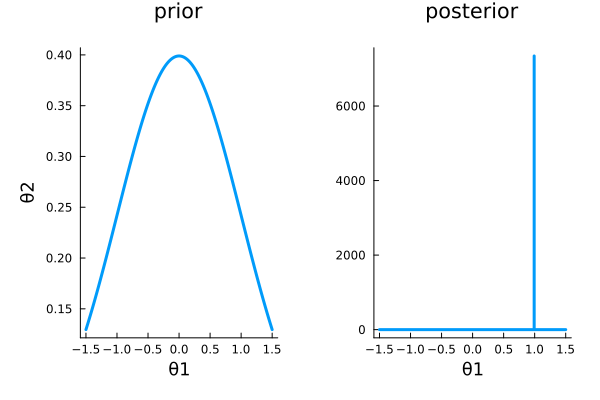

In [181]:
# YOUR CODE HERE
@model function auto_regression(μ_θ, Σ_θ, τ; N=1)
    "Bayesian linear regression"
    
    # Allocate data variables
    X = datavar(Float64, N)
    y = datavar(Float64, N)
    
    # Prior distribution of coefficients
    θ ~ NormalMeanVariance(μ_θ, Σ_θ)
    
    for i = 1:N

        # Likelihood of i-th sample
        y[i] ~ NormalMeanVariance(θ*X[i], τ^-1)
        
    end
    return y, X, θ
end

# Prior parameters
μ_θ, Σ_θ = (0, 1)

# Likelihood variance
τ = 1;
num_samples = length(past_data[:,1])
dates_num = 1:num_samples

# Call inference function
results = inference(
    model       = auto_regression(μ_θ, Σ_θ, τ, N=num_samples-1),
    data        = (y = past_data[:,2][2:num_samples], X = past_data[:,2][1:num_samples-1]),
    returnvars  = (θ = KeepLast()),
)

# Extract posterior weights 
post_θ = results.posteriors[:θ]

# Define ranges for plot
x1 = range(-1.5, length=500, stop=1.5)

# Draw contour plots of distributions
x1 = range(-1.5, step=0.01, stop=1.5)
prior_θ = Normal(μ_θ, Σ_θ)
p1a = plot(x1, pdf(prior_θ, x1), xlabel="θ1", ylabel="θ2", title="prior", label="")

x1 = range(-1.5, step=0.0001, stop=1.5)
p1b = plot(x1, pdf(post_θ, x1), xlabel="θ1", title="posterior", label="")
plot(p1a, p1b)

## 2. Predictions & model evaluation

We want to evaluate the parameters inferred under the model. For now, we will do this by visually inspecting the 1-step ahead predictions on our data set. Later, we will use free energy as a metric. 

The posterior predictive distribution for the next time step is:

$$ p(y_{k+1} \mid \bar{y}_k, \mathcal{D}) = \int p(y_{k+1} \mid \theta, \bar{y}_k) p(\theta \mid \mathcal{D}) \, \mathrm{d}\theta \, , $$

where $\mathcal{D}$ refers to the past data (used to infer the posterior distribution) and $\bar{y}$ refers to the previous $M$ data points (i.e. $\bar{y}_k = [y_{k-1} \dots y_{k-M}]$). To make 1-step ahead predictions, you will have to loop over the data (i.e., `for k in 1:T`), plug in the current data point and compute the parameters of the posterior predictive distribution for the next data point. You may start from $k=2$, using $y_1$ as initial "previous observation". 

Tasks:
- [1pt] Derive the parameters of the posterior predictive and compute the 1-step ahead predictions on the data set. Plot the first 10 predictions (_mean and 1 standard deviation_) along with the data $y_{2:11}$.

---

Note that if you failed to infer a posterior distribution in the previous question, you can still answer this question using a standard normal, $p(\theta) = \mathcal{N}(0,1)$.

Coefficient = 0.9919845349704672


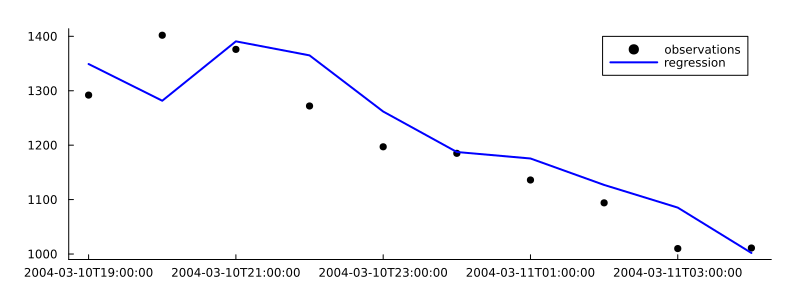

In [183]:
# YOUR CODE HERE
# Extract estimated weights
θ_MAP = mode(post_θ)
num_samples = 11

# Report results
println("Coefficient = "*string(θ_MAP))

# Make predictions
regression_estimated = past_data[:,2][1:num_samples-1] * θ_MAP;

# Visualize observations
scatter(past_data[:,1][2:num_samples], past_data[:,2][2:num_samples], color="black", label="observations", legend=:topright)

# Overlay regression function
plot!(past_data[:,1][2:num_samples], regression_estimated, color="blue", label="regression", linewidth=2, size=(800,300))

## 3. Model critiqueing & improvement

From the results of the previous question, you may conclude that our initial model isn't great: it only considers extremely short-term changes, which are highly affected by noise. If we want the model to consider changes over longer periods of time, then we need to increase the order of the auto-regressive model. That corresponds to:

$$ y_k = \sum_{m=1}^{M} \theta_m y_{k-m} + \epsilon_k \, ,$$

where $M$ refers to model order.

Tasks:
- [1pt] Specify a higher-order AR model with an order parameter $M$, and with an appropriate prior on the AR coefficients. Visualize the 1-step ahead predictions (_mean and variance_) on the data.

In [ ]:
# YOUR CODE HERE
error("Not Implemented")

## 4. Model selection & deployment

Every value of $M$ produces a different model. But which is the best? 

For now, we will evaluate models using a non-Bayesian criterion. The mean-squared error between the MAP solution and future data can be calculated with:

$$ \text{MSE} = \frac{1}{T} \sum_{k=1}^{T} \big(\sum_{m=1}^{M} \hat{\theta}^{\text{MAP}}_m y_{k-m} - y_{k} \big)^2 $$

Tasks:
- [1pt] Compute the mean squared errors for a range of values of $M$ (AR model order) and report the best performing one.
- [1pt] Deploy the best model on the future data (1-step ahead predictions) and visualize the predictions (_mean and 1 standard deviation_).

In [ ]:
# YOUR CODE HERE
error("Not Implemented")

In [ ]:
# Load test data
future_data = DataFrame(CSV.File("data/airquality_future.csv"))

In [ ]:
# YOUR CODE HERE
error("Not Implemented")